# Secretary problem


## Different K

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
n = 100

probabilites = []
for k in range(5,101,5):
    got_best = 0
    for j in range(10000):
        candidates = np.random.choice(range(n), n, replace=False)
        k_best = max(candidates[:k])
        for i in range(n-k):
            if candidates[i+k] > k_best:
                if candidates[i+k] == n-1:
                    got_best +=1
                break
    probabilites.append(got_best/10000)

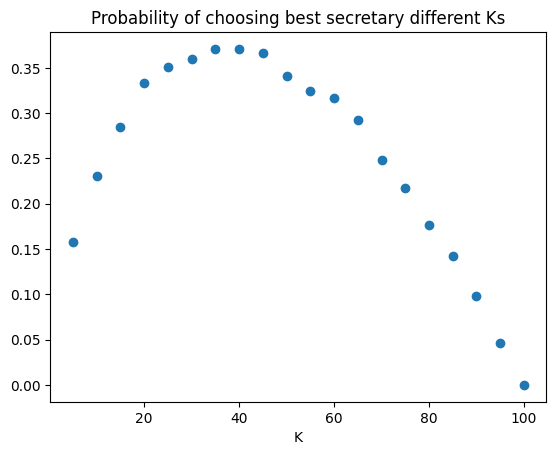

In [250]:
Ks = range(5,101,5)
plt.scatter(Ks,probabilites)
plt.title("Probability of choosing best secretary different Ks")
plt.xlabel("K")
plt.show()

In [235]:
print(f"The best K is {np.argmax(probalities)*5} with probability {max(probalities)}")

The best K is 35 with probability 0.3696


## Different N

In [251]:
probabilites = []
for n in range(3,101):
    k = int(n/np.e)
    got_best = 0
    for j in range(10000):
        candidates = np.random.choice(range(n), n, replace=False)
        k_best = max(candidates[:k])
        for i in range(n-k):
            if candidates[i+k] > k_best:
                if candidates[i+k] == n-1:
                    got_best +=1
                break
    probabilites.append(got_best/10000)

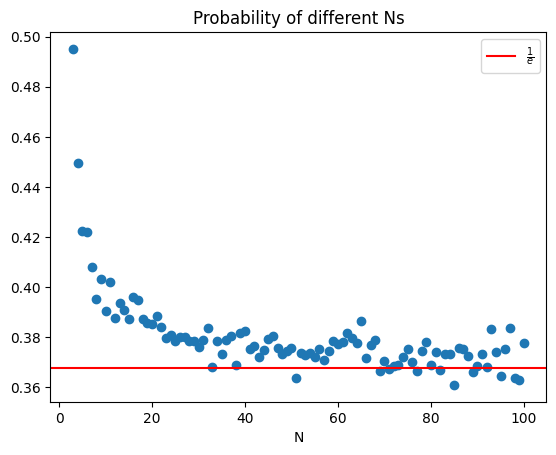

In [273]:
Ns = range(3,101)
plt.axhline(y=1/np.e, color='r', linestyle='-')
plt.scatter(Ns,probabilites)
plt.legend(['$\\frac{1}{e}$'])
plt.title("Probability of different Ns")
plt.xlabel("N")
plt.show()

# Central Limit Theorem

In [2]:
import numpy as np
import pandas as pd
def Distribution(stdNum):
    np.random.seed(1)
    popSize = 1000 

    a1 = stdNum - int(stdNum / 10) * 10
    a2 = int((stdNum - int(stdNum / 100) * 100)/10)
    a3 = int(stdNum / 100)

    
    mu1, sigma1 = a1/2, np.abs(0.5 + 3*a2/10)
    mu2, sigma2 = -1 * a2/2, np.abs(1 + 3*a3/10)
    mu3, sigma3 = a3/2, np.abs(2 + 3*a1/10)


    distributions = [
    {"type": np.random.normal, "kwargs": {"loc": mu1, "scale": sigma1}},
    {"type": np.random.normal, "kwargs": {"loc": mu2, "scale": sigma2}},
    {"type": np.random.normal, "kwargs": {"loc": mu3, "scale": sigma3}},
    ]
    coefficients = np.array([0.4, 0.25, 0.35])
    coefficients /= coefficients.sum()
    popSize = 100000


    num_distr = len(distributions)
    data = np.zeros((popSize, num_distr))
    for idx, distr in enumerate(distributions):
        data[:, idx] = distr["type"](size=(popSize,), **distr["kwargs"])
    random_idx = np.random.choice(np.arange(num_distr), size=(popSize,), p=coefficients)
    Population = data[np.arange(popSize), random_idx]

    return Population


In [3]:
data = Distribution(407)

In [4]:
n = 1000
s = 10000
Means = []
for i in range(s):
    Sample = np.random.choice(data,size = n)
    Means.append(Sample.mean())

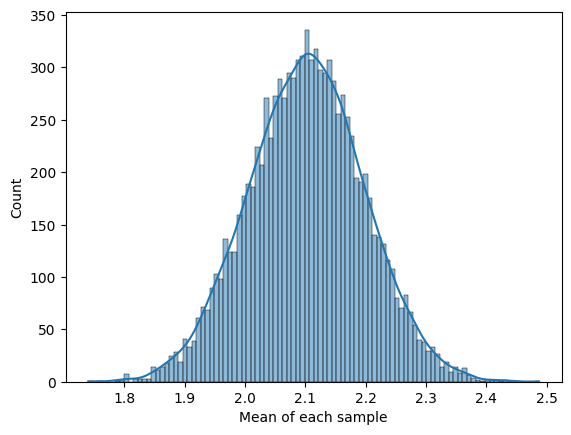

In [7]:
sns.histplot(Means,bins = 100,kde=True)
plt.xlabel("Mean of each sample");

In [8]:
wine = pd.read_csv('Q1 files\\wine.csv')

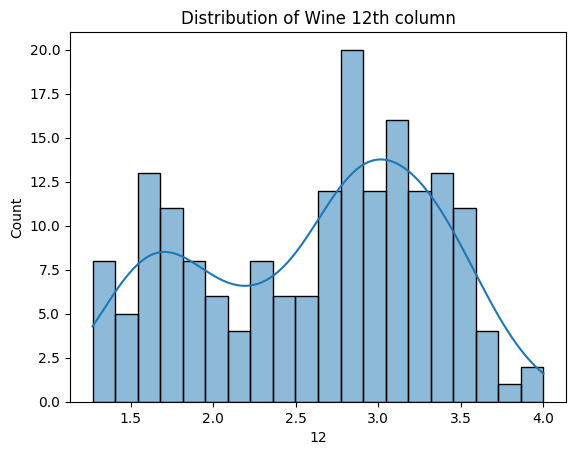

In [10]:
wine['12']
sns.histplot(wine['12'],bins = 20,kde=True)
plt.title("Distribution of Wine 12th column");

In [11]:
n = 100
s = 100000
Means = []
for i in range(s):
    Sample = np.random.choice(wine['12'],size = n)
    Means.append(Sample.mean())

In [19]:
Mea.std(), wine['12'].std()

(0.0707524725592821, 0.7099904287650504)

In [18]:

sum(Means)/s, wine['12'].mean()

(2.6117408049999997, 2.6116853932584267)

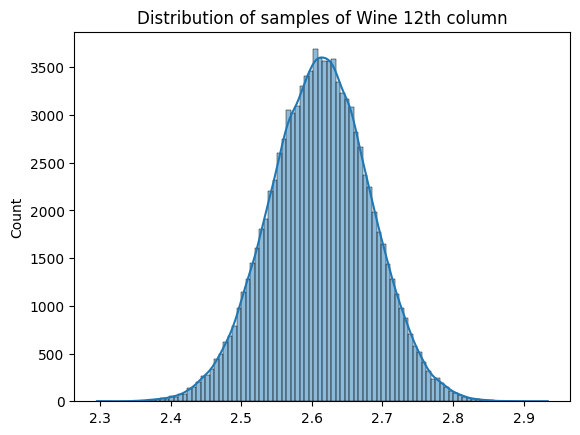

In [13]:
sns.histplot(Means,bins = 100,kde=True)
plt.title("Distribution of samples of Wine 12th column");

In [20]:
wine_mean = wine['12'].mean()
wine_sampe_mean = np.array(Means).mean()
wine_std = wine['12'].std()
wine_sample_std = np.array(Means).std()

In [26]:
print(f"original mean and std are {wine_mean:0.4f}, {wine_std:0.4f}")
print(f"sample mean and std are {wine_sampe_mean:0.4f}, {wine_sample_std:0.4f}")

original mean and std are 2.6117, 0.7100
sample mean and std are 2.6117, 0.0708
